In [25]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

df_ifood = pd.read_csv('ifood_df.csv')

#Performing Exploratory Data Analysis
print(df_ifood.info())
df_ifood.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [26]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

#Displaying n rows from the dataset
def view_data(n):
    display(df_ifood.head(n))

#Creating a slider to choose number of rows to display
rows_slider = widgets.IntSlider(min=1, description='Data_Rows:')

#Displaying slider
interact(view_data, n=rows_slider)

interactive(children=(IntSlider(value=1, description='Data_Rows:', min=1), Output()), _dom_classes=('widget-in…

<function __main__.view_data(n)>

In [27]:
#Calculating z-score
threshold = 3
z_score = stats.zscore(df_ifood)
z_score_df = pd.DataFrame(z_score, columns=df_ifood.columns)

#Identify the outliers and changing it with median
for column in df_ifood.columns:
    df_ifood[column] = np.where((np.abs(z_score_df[column]) > threshold), df_ifood[column].median(), df_ifood[column])
    
df_ifood.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.0,2205.0,2205.0,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,297.641723,21.746939,148.803628,32.396825,22.556009,39.892063,...,0.257596,0.0,0.0,0.0,0.504762,0.165079,0.215873,558.119728,514.974603,0.219501
std,20713.063826,0.537132,0.544380,28.932111,324.511388,31.280367,189.841256,45.766014,32.865247,44.232722,...,0.437410,0.0,0.0,0.0,0.500091,0.371336,0.411520,569.379130,548.417655,0.494875
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68281.000000,1.000000,1.000000,74.000000,494.000000,28.000000,214.000000,42.000000,29.000000,52.000000,...,1.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,961.000000,880.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1315.000000,144.000000,818.000000,202.000000,150.000000,199.000000,...,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,2262.000000,2145.000000,2.000000


In [28]:
#Creating new features
df_ifood['NumPurchases'] = df_ifood[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df_ifood['Childrenhome'] = (df_ifood['Kidhome'] + df_ifood['Teenhome']).apply(lambda x: 1 if x > 0 else 0)
df_ifood['Is_Educated'] = df_ifood[['education_Master', 'education_PhD']].max(axis=1)

#Dropping unnecessary columns
df_ifood=df_ifood.drop(columns=['Kidhome','Teenhome','education_Master','education_PhD'])
print(df_ifood.head())

    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0     58.0     635.0       88.0            546.0            172.0   
1  46344.0     38.0      11.0        1.0              6.0              2.0   
2  71613.0     26.0     426.0       49.0            127.0            111.0   
3  26646.0     26.0      11.0        4.0             20.0             10.0   
4  58293.0     94.0     173.0       43.0            118.0             46.0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0              88.0          88.0                3.0              8.0  ...   
1               1.0           6.0                2.0              1.0  ...   
2              21.0          42.0                1.0              8.0  ...   
3               3.0           5.0                2.0              2.0  ...   
4              27.0          15.0                5.0              5.0  ...   

   marital_Widow  education_2n Cycle  education_Basic  educati

**Calculating correlation among features**

Text(0.5, 1.0, 'Correlation')

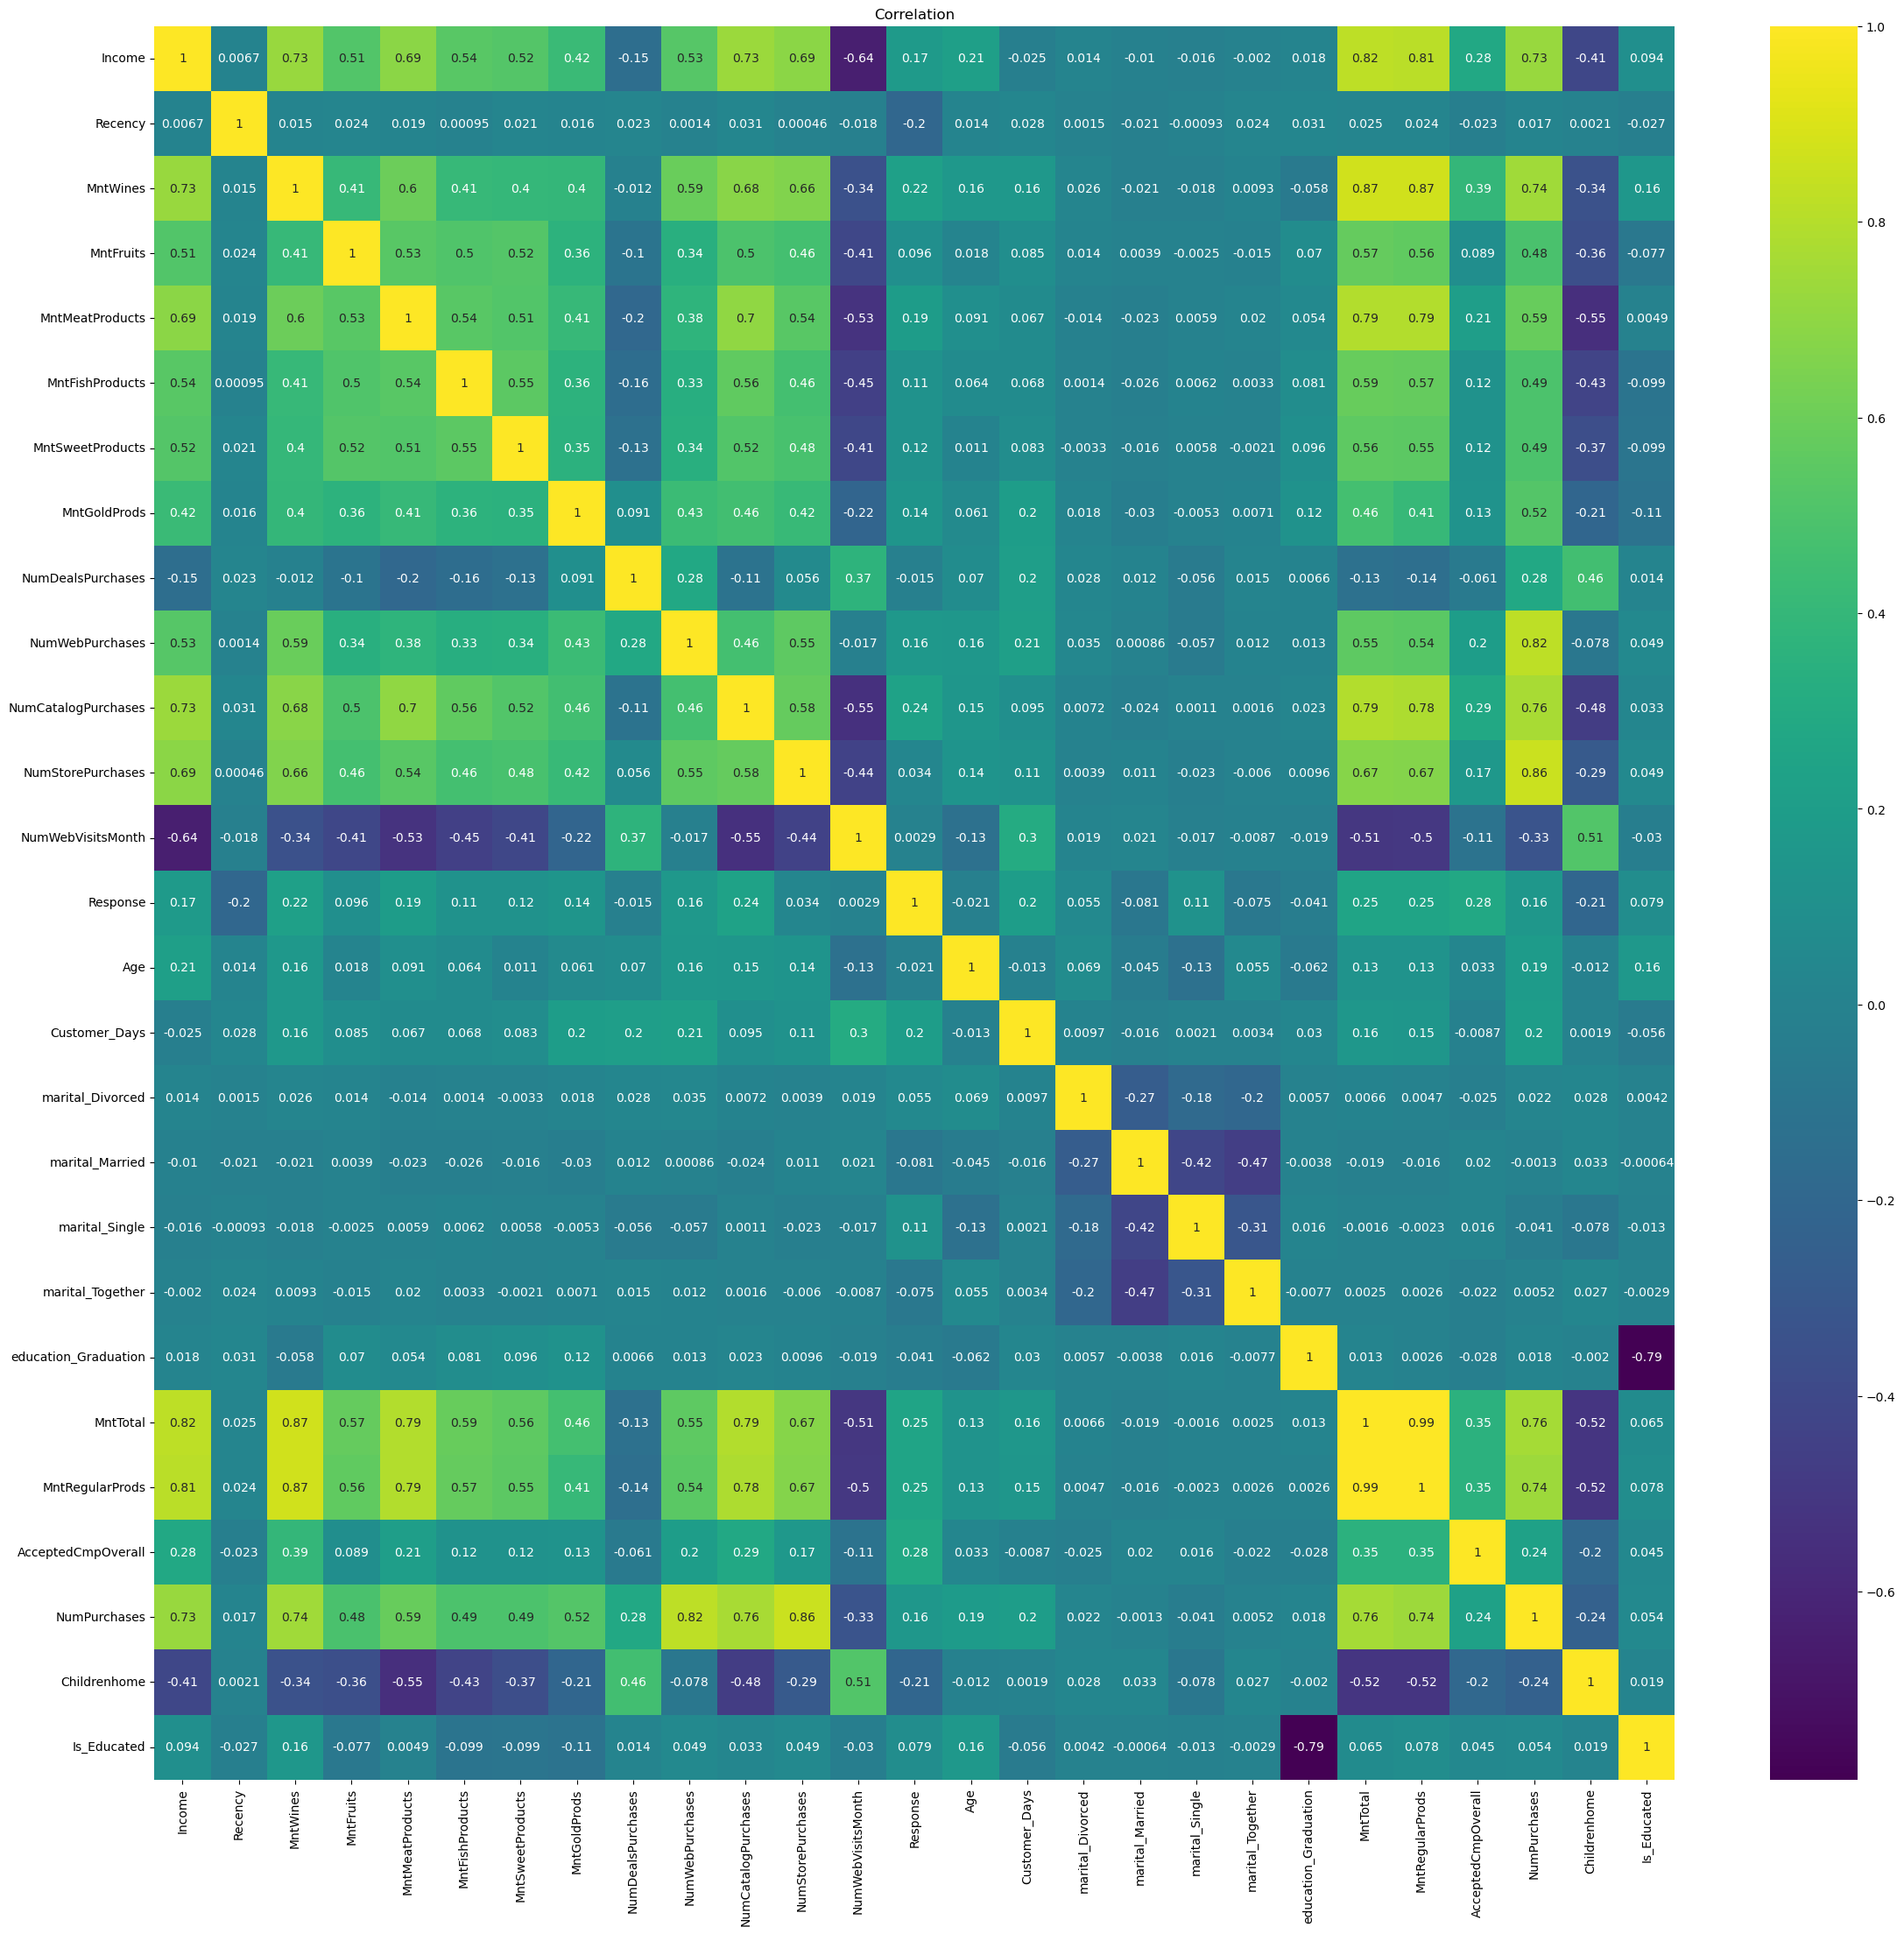

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Removing features with standard deviation is less than zero
df_ifood = df_ifood.loc[:, df_ifood.std() > 0]
#calculating correlation between features
correlation = df_ifood.corr()

plt.subplots(figsize=(28,26))
sns.heatmap(correlation, cmap='viridis', annot=True)
plt.title('Correlation')

**Taking user input for features and displaying correlation between those features**

In [30]:
@interact
def corr(feature_1=list(df_ifood.select_dtypes('number').columns),
         feature_2=list(df_ifood.select_dtypes('number').columns)):
         print(f"Correlation: {df_ifood[feature_1].corr(df_ifood[feature_2])}")

interactive(children=(Dropdown(description='feature_1', options=('Income', 'Recency', 'MntWines', 'MntFruits',…

**Interactively displaying scatter plot for different features in the dataset**

In [31]:
def scatterplot(feature1, feature2):
    plt.figure(figsize=(6, 4))
    plt.scatter(df_ifood[feature1], df_ifood[feature2])
    plt.title('Scatter-Plot ')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

#Creating a widget options to select X-axis and Y-axis for the scatter plot
interact(scatterplot, feature1=widgets.Dropdown(options=df_ifood.columns, description='X-axis:'), feature2=widgets.Dropdown(options=df_ifood.columns, description='Y-axis:', value='MntWines'))

interactive(children=(Dropdown(description='X-axis:', options=('Income', 'Recency', 'MntWines', 'MntFruits', '…

<function __main__.scatterplot(feature1, feature2)>

**Displaying scatter plot for Number of Purchases based on Income and children at home**

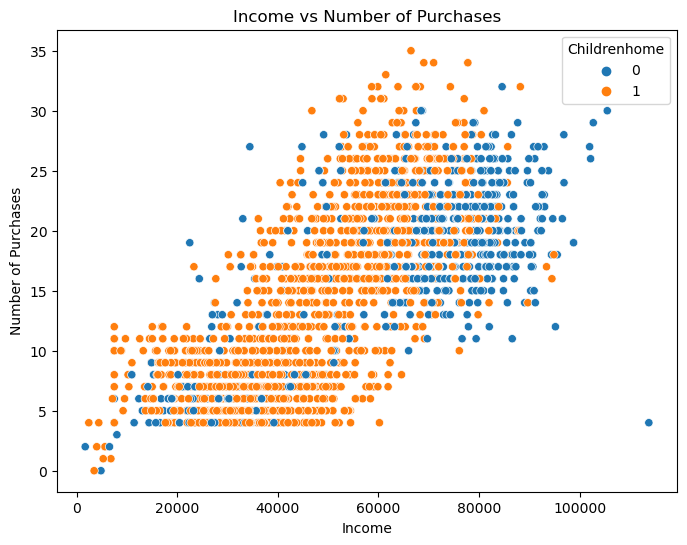

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ifood, x="Income", y="NumPurchases", hue="Childrenhome")
plt.xlabel("Income")
plt.ylabel("Number of Purchases")
plt.title("Income vs Number of Purchases")
plt.show()

**Visualizing the Age distribution of customers**

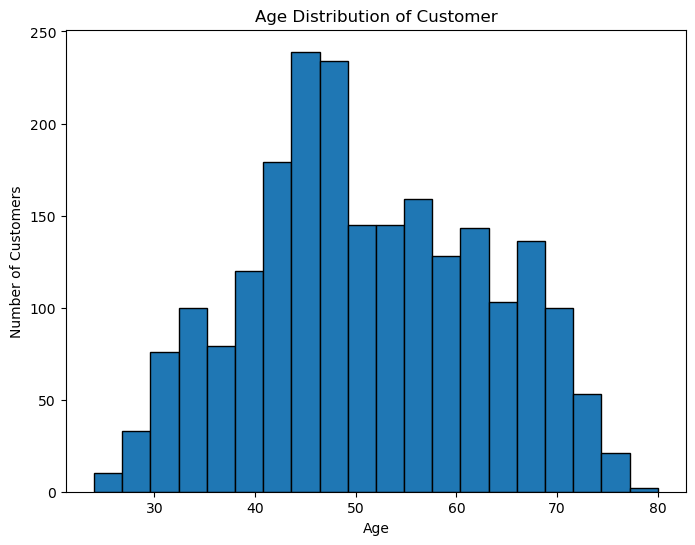

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df_ifood['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customer')
plt.show()

**Visualizing number of products sold**

Text(0.5, 1.0, 'Amount of Each Products Sold')

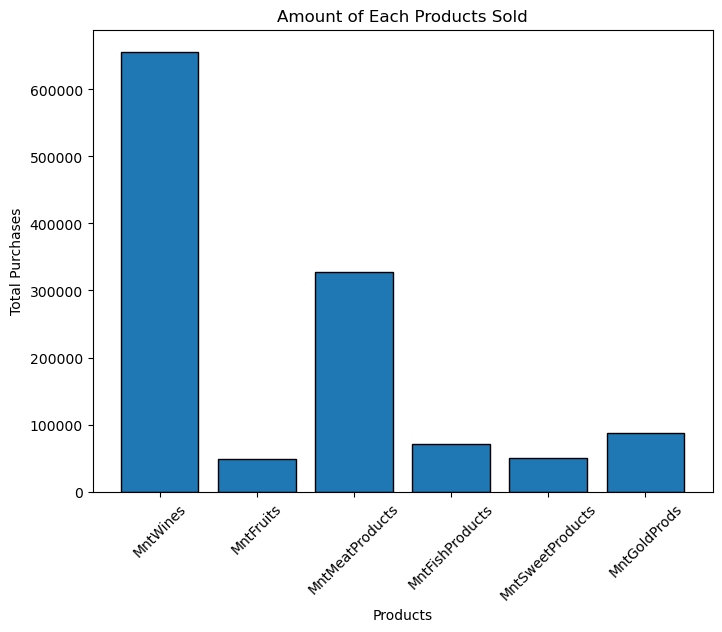

In [34]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_purchase = df_ifood[products].sum()

plt.figure(figsize=(8, 6))
plt.bar(products, total_purchase, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Products')
plt.ylabel('Total Purchases')
plt.title('Amount of Each Products Sold')

**Visualizing the distribution of types of purchases**

Text(0.5, 1.0, 'Type of purchases w.r.t. Total purchases')

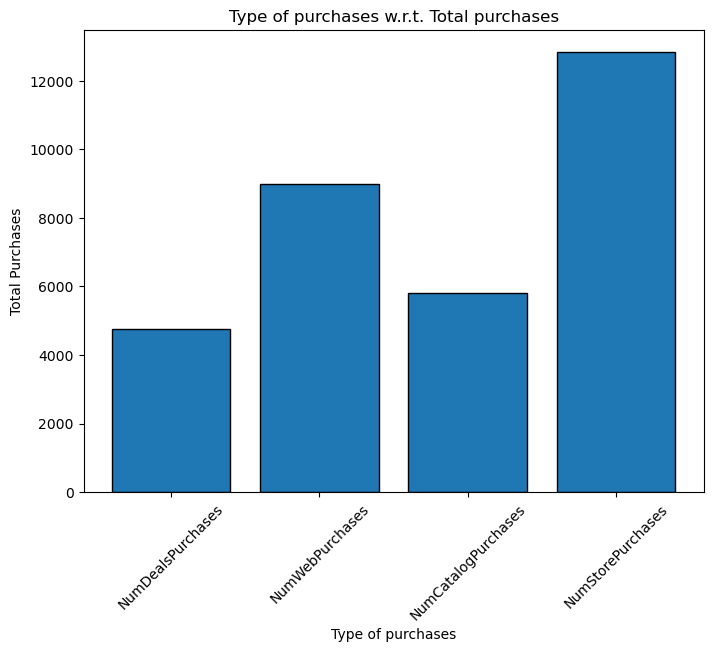

In [35]:
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_purchase = df_ifood[purchases].sum()

plt.figure(figsize=(8, 6))
plt.bar(purchases, total_purchase, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Type of purchases')
plt.ylabel('Total Purchases')
plt.title('Type of purchases w.r.t. Total purchases')

**Visualizing Total Wine Purchases by Purchase Type**

Text(0.5, 1.0, 'Total Wine Purchases by Purchase Type')

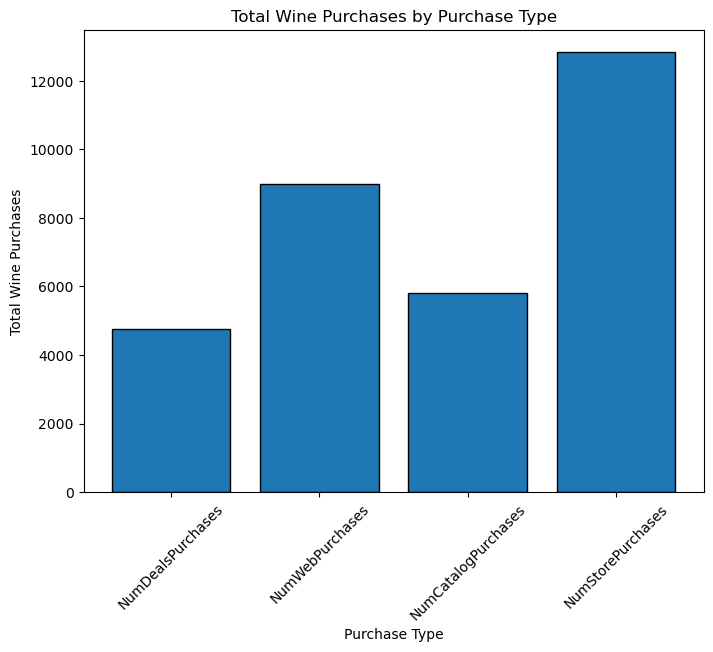

In [36]:
purchase_types = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calculating the total purchases of wine for each type
wine_purchases = df_ifood[purchase_types].sum()

plt.figure(figsize=(8, 6))
plt.bar(purchase_types, wine_purchases, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Purchase Type')
plt.ylabel('Total Wine Purchases')
plt.title('Total Wine Purchases by Purchase Type')

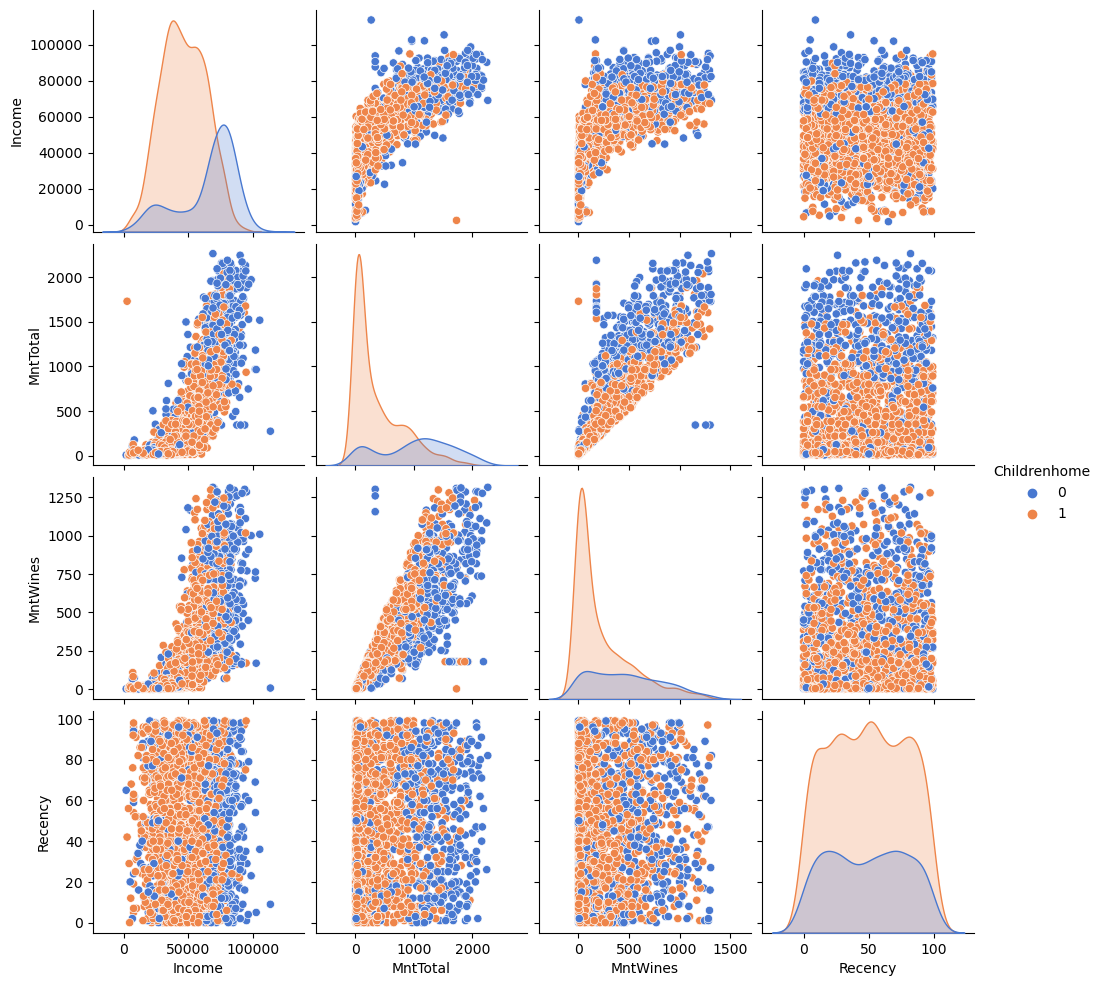

In [37]:
columns = ['Income', 'MntTotal', 'MntWines', 'Recency', 'Childrenhome']

#Creating the pairplot to visualize different features
sns.pairplot(df_ifood[columns], hue="Childrenhome", palette="muted")

***Elbow Method***

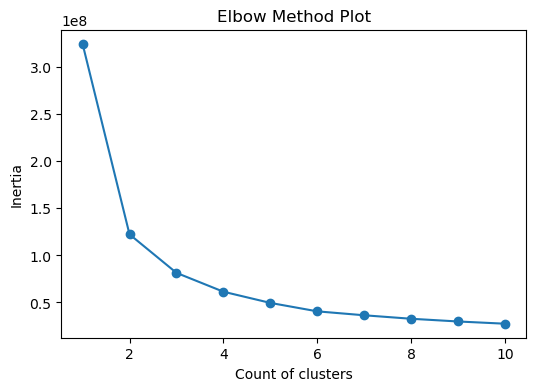

In [41]:
from sklearn.cluster import KMeans

features = df_ifood[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

k = []
l = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init=10)
    k_means.fit(features)
    
    k.append(i)
    l.append(k_means.inertia_)
    
#Plotting Elbow method
plt.figure(figsize=(6, 4))
plt.plot(k, l, 'o-')
plt.xlabel('Count of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method Plot')
plt.show()

***K-Means Clustering***

                Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Clusters                                                                    
0         37816.500398  48.444622   68.725100   8.747410        37.695618   
1         73960.503067  50.453988  919.723926  41.429448       342.073620   
2         67717.767628  49.389423  433.044872  37.608974       271.294872   

          MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Clusters                                                                       
0               12.462948          8.709960     21.643028           2.226295   
1               59.141104         41.392638     62.377301           1.871166   
2               58.516026         40.562500     64.847756           2.171474   

          NumWebPurchases  ...  marital_Married  marital_Single  \
Clusters                   ...                                    
0                2.663745  ...         0.392829        0.224701   
1           

C:\Users\sanch\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


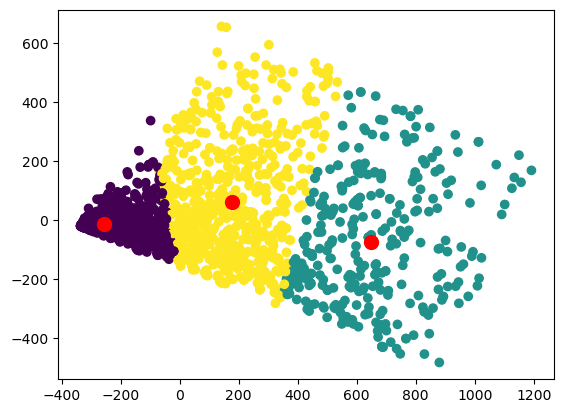

In [39]:
#Initializing KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

#Cluster labels
label = kmeans.fit_predict(features)
df_ifood['Clusters'] = label

#Calculating mean values for each cluster
cluster_info = df_ifood.groupby('Clusters').mean()

#Printing cluster Information
print(cluster_info)

#Checking cluster centers
centers = kmeans.cluster_centers_

#Performing PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
pca_cluster_centers = pca.transform(centers)

#Plotting Clusters
plt.scatter(pca_features[:,0], pca_features[:,1], c=label)
plt.scatter(pca_cluster_centers[:, 0], pca_cluster_centers[:,1], marker='o', s=100, c='red')

cluster_info.to_csv(r"C:\Users\sanch\Downloads\Cluster.csv")

**Visualizing Clusters**

Text(0.5, 1.0, 'Marital Status by Cluster')

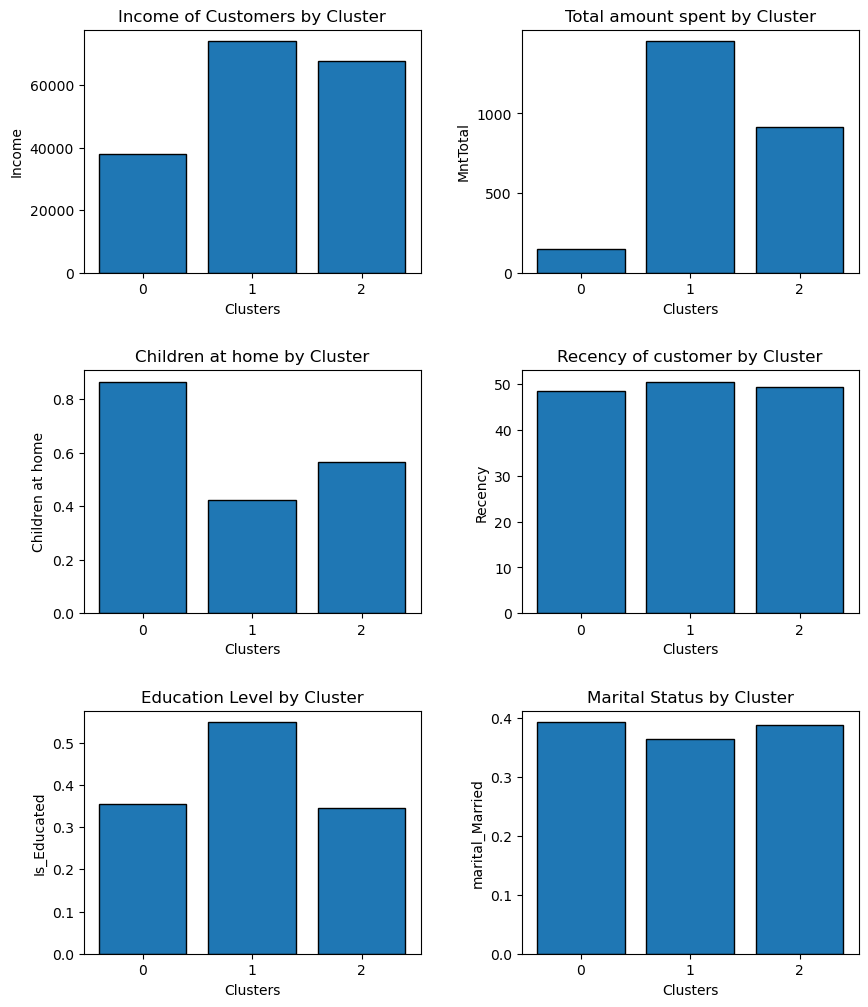

In [40]:
cluster_df = pd.read_csv('Cluster.csv')

plt.figure(figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.subplot(3, 2, 1)
plt.bar(cluster_df['Clusters'], cluster_df['Income'], edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Income')
plt.xticks(np.arange(0, max(cluster_df['Clusters']) + 1, step=1))
plt.yticks(np.arange(0, max(cluster_df['Income']) + 1, step=20000))
plt.title('Income of Customers by Cluster')

plt.subplot(3, 2, 2)
plt.bar(cluster_df['Clusters'], cluster_df['MntTotal'], edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('MntTotal')
plt.xticks(np.arange(0, max(cluster_df['Clusters']) + 1, step=1))
plt.yticks(np.arange(0, max(cluster_df['MntTotal']) + 1, step=500))
plt.title('Total amount spent by Cluster')

plt.subplot(3, 2, 3)
plt.bar(cluster_df['Clusters'], cluster_df['Childrenhome'], edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Children at home')
plt.xticks(np.arange(0, max(cluster_df['Clusters']) + 1, step=1))
plt.title('Children at home by Cluster')

plt.subplot(3, 2, 4)
plt.bar(cluster_df['Clusters'], cluster_df['Recency'], edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Recency')
plt.xticks(np.arange(0, max(cluster_df['Clusters']) + 1, step=1))
plt.yticks(np.arange(0, max(cluster_df['Recency']) + 1, step=10))
plt.title('Recency of customer by Cluster')

plt.subplot(3, 2, 5)
plt.bar(cluster_df['Clusters'], cluster_df['Is_Educated'], edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Is_Educated')
plt.xticks(np.arange(0, max(cluster_df['Clusters']) + 1, step=1))
plt.title('Education Level by Cluster')


plt.subplot(3, 2, 6)
plt.bar(cluster_df['Clusters'], cluster_df['marital_Married'], edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('marital_Married')
plt.xticks(np.arange(0, max(cluster_df['Clusters']) + 1, step=1))
plt.title('Marital Status by Cluster')